# Importing necessary libraries, setting up environment and paths, and preparing data for a convolutional neural network.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt 
import os 
import cv2 
import numpy as np
import pandas as pd

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# setting up image categories and paths, verifies the path, iterates through image directories, resizes images, and stores them with their corresponding labels in image_data.

In [2]:
import os
import cv2

CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

data_path = "D:\machine learning practice\hand recognition uing computer vision\leapGestRecog\leapGestRecog"
image_data = []
if not os.path.exists(data_path):
    print(f"The specified path does not exist: {data_path}")
else:
    
    for dr in os.listdir(data_path):
        
        if dr in CATEGORIES:
            path = os.path.join(data_path, dr)
            for img in os.listdir(path):
                try:
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    image_data.append([new_array, CATEGORIES.index(dr)])
                except Exception as e:
                    pass

# iterating through directories and categories to read, resize, and label images, then appends them to image_data.


In [3]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

# shuffling the `image_data` list randomly.

In [4]:
import random
random.shuffle(image_data)

# The code separates image_data into input_data for images and label for corresponding labels.

In [5]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

# retrieving and displays the first 10 labels from the label list.

In [6]:
label[:10]

[6, 2, 1, 8, 5, 7, 6, 7, 6, 9]

# plotting the first 9 images from `image_data` with their labels as titles in a 3x3 grid.

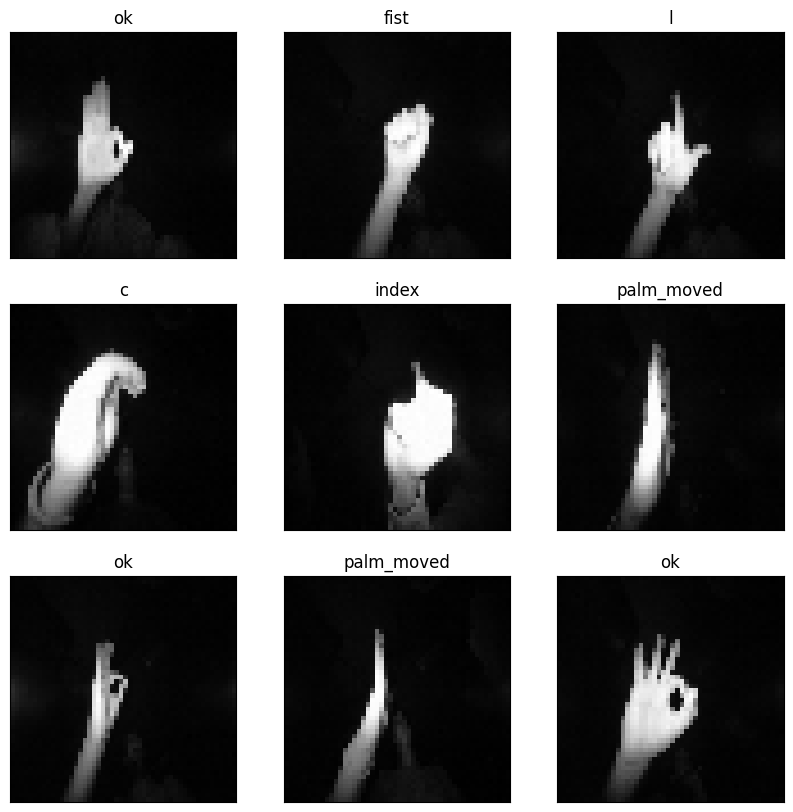

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):  # Adjusted range to start from 0 to 8 for Python's 0-based indexing
    plt.subplot(3, 3, i + 1)  # Adjusted index for subplot to start from 1
    plt.imshow(image_data[i][0], cmap='gray')  # Assuming image_data[i][0] is correctly accessing the image
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])  # Assuming label[i] correctly indexes CATEGORIES and slicing is intended
plt.show()

# converting `input_data` and `label` to numpy arrays, normalizes `input_data`, and outputs its shape.

In [9]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

# converting categorical labels into one-hot encoded format using Keras' `to_categorical` function.

In [10]:
import keras
from keras.utils import to_categorical
label = to_categorical(label)

# reshaping `input_data` to have dimensions (-1, IMG_SIZE, IMG_SIZE, 1), where -1 indicates that the size of that dimension is inferred based on the original shape and the specified IMG_SIZE.

In [11]:
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

# test train split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label,test_size=0.2, random_state=42, shuffle=True)

# printing values and shape of train and test data

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 50, 50, 1)
(4000, 50, 50, 1)
(16000, 10)
(4000, 10)


# setting up a convolutional neural network (CNN) model in Keras for image classification with specified layers and configurations.

In [14]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

# training the Keras `model` on training data `X_train` and `y_train` for 4 epochs with a batch size of 32, validating on `X_test` and `y_test`, storing the training history in `history`.

In [15]:
history = model.fit(X_train, y_train, epochs =4, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/4
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 143ms/step - accuracy: 0.7743 - loss: 0.7109 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 2/4
500/500 ━━━━━━━━━━━━━━━━━━━━ 78s 135ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9995 - val_loss: 0.0013
Epoch 3/4
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 138ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9992 - val_loss: 0.0017
Epoch 4/4
500/500 ━━━━━━━━━━━━━━━━━━━━ 68s 135ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 2.5245e-04


# summary of model

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,333,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,691,926 (33.16 MB)

 Trainable params: 4,345,962 (16.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,345,964 (16.58 MB)

# ploting the training and validation accuracy over epochs for the model stored in `history`.

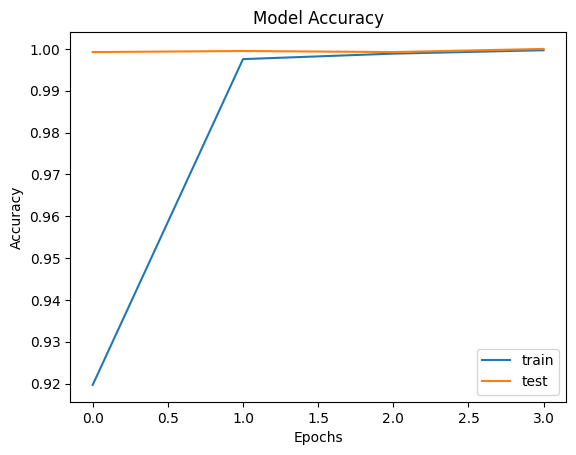

In [17]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# visualizing training and validation loss on the left and training and validation accuracy on the right, highlighting the epochs with the lowest validation loss and highest validation accuracy.

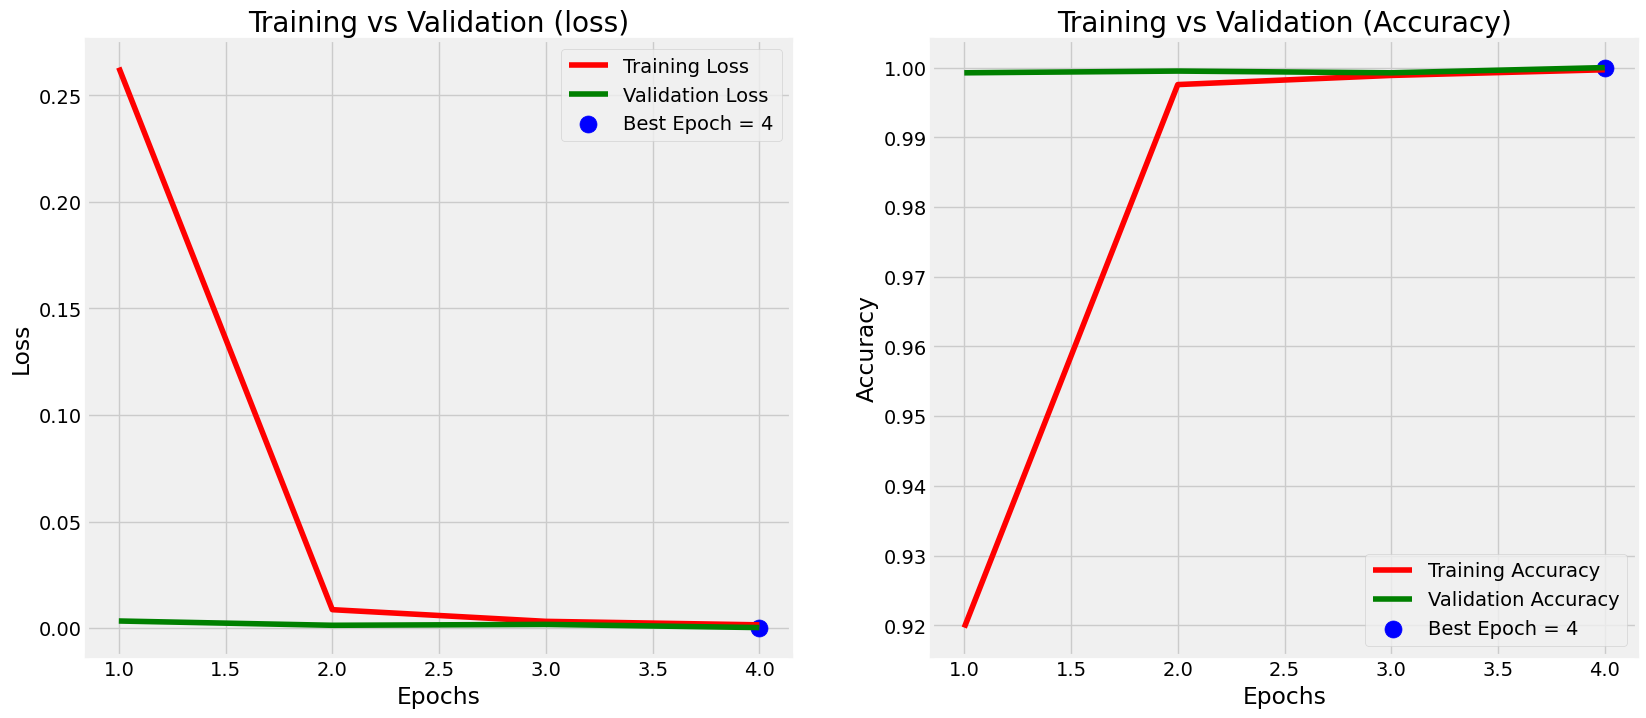

In [18]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))

plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show();

# testing accuracy

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 1.8076e-04
Test accuracy: 100.00%
